# Assignment 2: Drone Delivery System
Saana Vallius 24.1.2018

In [1]:
#Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import matplotlib.pyplot as plt
import timeit
from sklearn import manifold, datasets

### 1. Visualize the client locations by making a two-dimensional scatterplot.

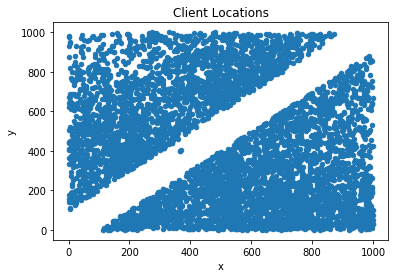

,x,y
count,5956.000000,5956.000000
mean,508.823177,427.554772
std,271.061462,289.044640
min,0.017692,0.043285
25%,282.582920,170.079921
50%,518.100892,397.786441
75%,727.156497,669.982518
max,999.533215,999.731720


In [2]:
#Read the csv
df = pd.read_csv('drone_delivery_v1.csv', sep =';')
df.drop('clientid', inplace=True, axis=1)
colnames = df.columns.get_values()

#Visualize the locations
df.plot.scatter(x='x',y='y')
plt.title('Client Locations')
plt.show()

#The variables x and y are already in the same range
#so there's no need for scaling

df.describe()

### 2. Find optimal locations using k-means

In [3]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
centroids_df = pd.DataFrame(centroids, columns=colnames)
print(centroids_df)

            x           y
0  549.768561  787.585462
1  197.201475  386.082239
2  700.789959  211.123104


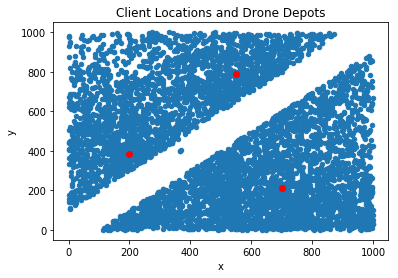

In [4]:
#Visualize the locations with the centeroids
df.plot.scatter(x='x',y='y')
plt.plot(centroids[:,0],centroids[:,1], 'ro')
plt.title('Client Locations and Drone Depots')
plt.show()

### 3 Attach the closest depot info to the clients

In [5]:
df['closest'] = labels
print("Ten first rows of the new dataframe with closest depots\n\n",df[:10])

Ten first rows of the new dataframe with closest depots

             x           y  closest
0  622.771572  164.857623        2
1  416.357298  630.193634        0
2  292.735020  567.333231        1
3  737.211288  166.225676        2
4  540.475375  682.912298        0
5  535.469492  318.439661        2
6  640.380050  870.833221        0
7  235.772075  359.048203        1
8  481.896884  661.491838        0
9  730.032789  312.177817        2


### 4. Make a scatteplot with three different colours

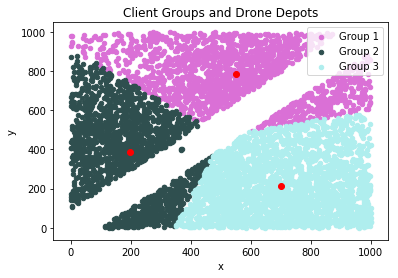

In [6]:
#Divide groups into separate tables
group1 = df[df['closest']==0]
group2 = df[df['closest']==1]
group3 = df[df['closest']==2]

#Create a scatterplot with separate colours for each group
ax = group1.plot.scatter(x='x', y='y', color='orchid', label='Group 1');
group2.plot.scatter(x='x', y='y', color='darkslategrey', label='Group 2', ax=ax);
group3.plot.scatter(x='x', y='y', color='paleturquoise', label='Group 3', ax=ax);
#Add the drone depots
plt.plot(centroids[:,0],centroids[:,1],'ro')
plt.title('Client Groups and Drone Depots')
plt.show()

### 5. Play with the number of depots
* 2 depots
* 5 depots
* 10 depots
* 25 depots

In [7]:
#Drop the extra column added
df.drop('closest', inplace=True, axis=1)

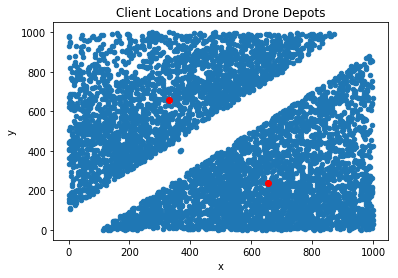

Execution time: 0.8588695069521699 ms


In [8]:
#2 Depots
start_time = timeit.default_timer()
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
centroids_df = pd.DataFrame(centroids, columns=colnames)

#Visualize the locations with the centeroids
df.plot.scatter(x='x',y='y')
plt.plot(centroids[:,0],centroids[:,1], 'ro')
plt.title('Client Locations and Drone Depots')
plt.show()

exect2 = timeit.default_timer() - start_time;
print('Execution time:',exect2,'ms')

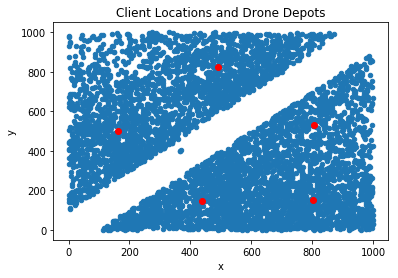

Execution time: 1.1991388734823687 ms


In [9]:
#5 Depots
start_time = timeit.default_timer()

kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
centroids_df = pd.DataFrame(centroids, columns=colnames)

#Visualize the locations with the centeroids
df.plot.scatter(x='x',y='y')
plt.plot(centroids[:,0],centroids[:,1], 'ro')
plt.title('Client Locations and Drone Depots')
plt.show()

exect5 = timeit.default_timer() - start_time;
print('Execution time:',exect5,'ms')

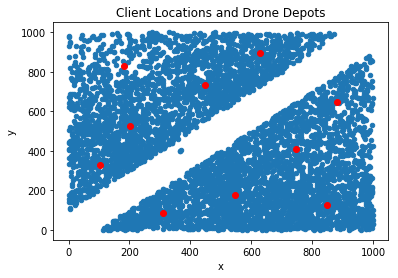

Execution time: 1.7164290500357469 ms


In [10]:
#10 Depots
start_time = timeit.default_timer()

kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
centroids_df = pd.DataFrame(centroids, columns=colnames)

#Visualize the locations with the centeroids
df.plot.scatter(x='x',y='y')
plt.plot(centroids[:,0],centroids[:,1], 'ro')
plt.title('Client Locations and Drone Depots')
plt.show()

exect10 = timeit.default_timer() - start_time;
print('Execution time:',exect10,'ms')

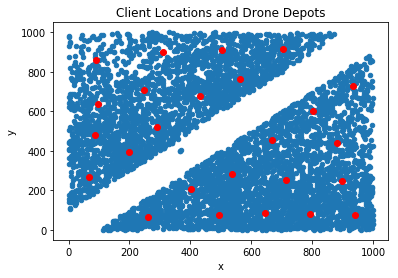

Execution time: 4.089089084596223 ms


In [11]:
#25 Depots
start_time = timeit.default_timer()

kmeans = cluster.KMeans(n_clusters=25)
kmeans.fit(df)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_
centroids_df = pd.DataFrame(centroids, columns=colnames)

#Visualize the locations with the centeroids
df.plot.scatter(x='x',y='y')
plt.plot(centroids[:,0],centroids[:,1], 'ro')
plt.title('Client Locations and Drone Depots')
plt.show()

exect25 = timeit.default_timer() - start_time;
print('Execution time:',exect25,'ms')

In [12]:
#Print the execution times including clustering and plotting

print("Execution times with different amounts of depots")
exects = {'Depots': [2,5,10,25], 'Time (ms)': [exect2, exect5, exect10, exect25]}
exects_df = pd.DataFrame(exects)
exects_df

Execution times with different amounts of depots


,Depots,Time (ms)
0,2,0.858870
1,5,1.199139
2,10,1.716429
3,25,4.089089


As seen in the table, the execution time increases when the number of clusters gets bigger. However, in this scale the differences are measured in seconds. For example, the difference between defining 5 clusters or 25 clusters is less than 5 seconds.

### 6. Agglomerative Hierarchical Clustering

In [13]:
#3 Depots
agglo = cluster.AgglomerativeClustering(n_clusters=3)
labels = agglo.fit_predict(df)

#Print some basic information on the first set:

#Cluster labels for each point
print(labels)

#Number of leaves in the hierarchical tree
print(agglo.n_leaves_)

#The estimated number of connected components in the graph
print(agglo.n_components_)

df['closest'] = labels
print("Ten first value pairs with closest depots (3 in total)\n\n",df[:10])

[0 2 2 ..., 2 1 0]
5956
1
Ten first value pairs with closest depots (3 in total)

             x           y  closest
0  622.771572  164.857623        0
1  416.357298  630.193634        2
2  292.735020  567.333231        2
3  737.211288  166.225676        0
4  540.475375  682.912298        1
5  535.469492  318.439661        0
6  640.380050  870.833221        1
7  235.772075  359.048203        2
8  481.896884  661.491838        2
9  730.032789  312.177817        0


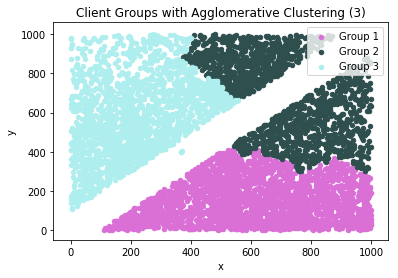

In [14]:
group1 = df[df['closest']==0]
group2 = df[df['closest']==1]
group3 = df[df['closest']==2]

#Create a scatterplot with separate colours for each group
ax = group1.plot.scatter(x='x', y='y', color='orchid', label='Group 1');
group2.plot.scatter(x='x', y='y', color='darkslategrey', label='Group 2', ax=ax);
group3.plot.scatter(x='x', y='y', color='paleturquoise', label='Group 3', ax=ax);

plt.title('Client Groups with Agglomerative Clustering (3)')
plt.show()

#### Let's try with more clusters

In [15]:
#5 Depots
agglo = cluster.AgglomerativeClustering(n_clusters=5)
labels = agglo.fit_predict(df)

#Cluster labels for each point
print(labels)

#Number of leaves in the hierarchical tree
print(agglo.n_leaves_)

#The estimated number of connected components in the graph
print(agglo.n_components_)

df['closest'] = labels
print("Ten first value pairs with closest depots (5 in total)\n\n",df[:10])

[3 0 0 ..., 0 2 1]
5956
1
Ten first value pairs with closest depots (5 in total)

             x           y  closest
0  622.771572  164.857623        3
1  416.357298  630.193634        0
2  292.735020  567.333231        0
3  737.211288  166.225676        3
4  540.475375  682.912298        4
5  535.469492  318.439661        1
6  640.380050  870.833221        4
7  235.772075  359.048203        0
8  481.896884  661.491838        0
9  730.032789  312.177817        1


[3 0 0 ..., 2 7 6]
5956
1
Ten first value pairs with closest depots (10 in total)

             x           y  closest
0  622.771572  164.857623        3
1  416.357298  630.193634        0
2  292.735020  567.333231        0
3  737.211288  166.225676        3
4  540.475375  682.912298        4
5  535.469492  318.439661        6
6  640.380050  870.833221        4
7  235.772075  359.048203        5
8  481.896884  661.491838        0
9  730.032789  312.177817        6


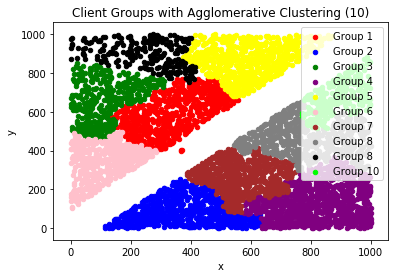

In [16]:
#10 Depots
agglo = cluster.AgglomerativeClustering(n_clusters=10)
labels = agglo.fit_predict(df)

#Cluster labels for each point
print(labels)

#Number of leaves in the hierarchical tree
print(agglo.n_leaves_)

#The estimated number of connected components in the graph
print(agglo.n_components_)

df['closest'] = labels
print("Ten first value pairs with closest depots (10 in total)\n\n",df[:10])

red = df.loc[df['closest'] == 0]
blue = df.loc[df['closest'] == 1]
green = df.loc[df['closest'] == 2]
purple = df.loc[df['closest'] == 3]
yellow = df.loc[df['closest'] == 4]
pink = df.loc[df['closest'] == 5]
brown = df.loc[df['closest'] == 6]
grey = df.loc[df['closest'] == 7]
black = df.loc[df['closest'] == 8]
lime = df.loc[df['closest'] == 9]

#Create a scatterplot with separate colours for each group
ax = red.plot.scatter(x='x', y='y', color='red', label='Group 1');
blue.plot.scatter(x='x', y='y', color='blue', label='Group 2', ax=ax);
green.plot.scatter(x='x', y='y', color='green', label='Group 3', ax=ax);
purple.plot.scatter(x='x', y='y', color='purple', label='Group 4', ax=ax);
yellow.plot.scatter(x='x', y='y', color='yellow', label='Group 5', ax=ax);
pink.plot.scatter(x='x', y='y', color='pink', label='Group 6', ax=ax);
brown.plot.scatter(x='x', y='y', color='brown', label='Group 7', ax=ax);
grey.plot.scatter(x='x', y='y', color='grey', label='Group 8', ax=ax);
black.plot.scatter(x='x', y='y', color='black', label='Group 8', ax=ax);
lime.plot.scatter(x='x', y='y', color='lime', label='Group 10', ax=ax);

plt.title('Client Groups with Agglomerative Clustering (10)')
plt.show()

With agglomerative clustering there are no centre points in the clusters as the calculations are done hierarchially. The algorithm produces a tree-like structure with the samples leaves. It uses affinity and linkage parameters that affect the way the computations are made. The differences between the results of the two algorithms used can be seen in the plots with three groups each of different color.